In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5] #Plotgröße anpassen
import matplotlib
matplotlib.rcParams['text.usetex'] = True
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}
matplotlib.rc('font', **font)
from sympy import *
init_printing(use_latex='mathjax')
#from scipy import signal
from IPython.display import display, Markdown

R,L,C,w=symbols('R,L,C,\omega',real=true)
Ic,U=symbols('Ic,U')
A,phi=symbols("A,varphi",real=true)

# Darstellung von Signalen

## Sinussignale

Mittels Python wird ein Sinussignal erstellt. Die Anzahl der Perioden, die Amplitude und die Frequenz können dabei frei gewählt werden.

In [2]:
fN = 100 #Frequenz in Hz
nN = 2 #Anzahl der Perioden
AN = 1 #Amplitude
phiN = np.pi/4#Phasenverschiebung in radiant

### Darstellung im Zeitbereich

Bei der Darstellung im Zeitbereich ist auf der horizontalen Achse die Zeit aufgetragen.

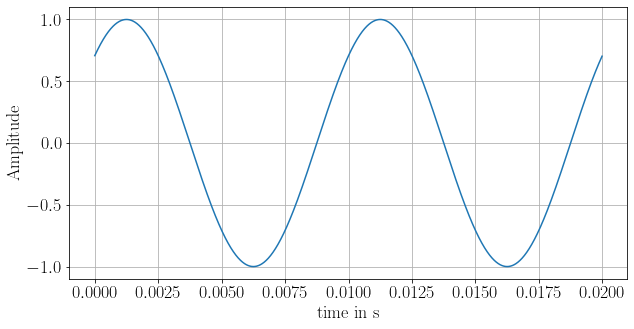

In [3]:
TN = 1/fN #Periodendauer
omega = 2*np.pi*fN #Kreisfrequenz

#Zeit array
tN = np.arange(0,nN*TN,TN/1000)

yN = np.sin(omega*tN+phiN)

plt.plot(tN,yN)
plt.grid()
plt.xlabel(r'time in s')
plt.ylabel(r'Amplitude')
plt.show()

### Darstellung auf der komplexen Zahlenebene

Unter der Voraussetzung einer reinen Sinusschwingung und einer konstanten Frequenz kann ein Signal auch auf der komplexen Zahlenebene dargestellt werden.

#### Komponentendarstellung

In [4]:
U=A*cos(phi)+A*I*sin(phi)
eq1 = Eq(S('U'),U) # Symbolischer Ausdruck
display(eq1)

U = ⅈ⋅A⋅sin(varphi) + A⋅cos(varphi)

In [5]:
display(Eq(S('U'),U.subs({A:AN,phi:phiN}))) # Mit Zahlenwerten Ausdruck

U = 0.707106781186548 + 0.707106781186547⋅ⅈ

#### Exponentialform

In [19]:
U = A*exp(I*phi)
display(Eq(S('U'),U)) # Symbolischer Ausdruck

       ⅈ⋅varphi
U = A⋅ℯ        

In [7]:
eq1 = Eq(S('U'),U.subs({A:AN,phi:phiN}))
display(eq1) # Mit Zahlenwerten Ausdruck

     0.785398163397448⋅ⅈ
U = ℯ                   

#### Grafische Darstellung

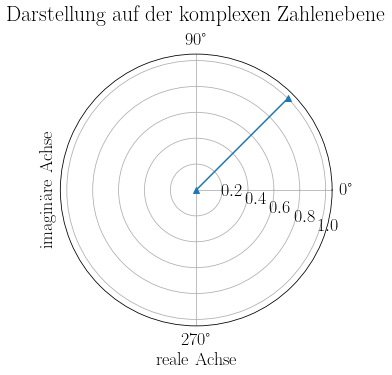

In [8]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot([0,phiN],[0,AN],marker='^')
#ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-20)  # Move radial labels away from plotted line
ax.set_xlim([0,2*np.pi])
ax.set_xticks([0,np.pi/2,6/4*np.pi])
ax.set_xlabel('reale Achse')
ax.set_ylabel('imaginäre Achse')
ax.grid(True)

ax.set_title("Darstellung auf der komplexen Zahlenebene", va='bottom')
plt.show()


## Darstellung im Frequenzbereich

Ändert sich ein Signal nicht mit der Zeit sondern mit der Frequenz so ist eine Darstellung von Vorteil bei der die Frequenz auf der horizontalen Achse aufgetragen wird.

Am Beispiel eines Serienschwingkreises soll dieser Zusammenhang verdeutlicht werden.

```{figure} ./images/RCL.jpg
:name: RCL
:height: 100px

RCL Schwingkreis
```

### Mathematische Schaltungsbeschreibung

In [9]:
LN=0.1 #H
RN=1000 #Ohm
CN=10**-6 #F

#### Impedanz

In [10]:
Z=R+I*w*L+1/(I*w*C)
eq1 = Eq(S('Z'),Z)
display(eq1)

                        ⅈ    
Z = ⅈ⋅L⋅\omega + R - ────────
                     C⋅\omega

Betrag der Impedanz

In [11]:
Zb = sqrt(re(Z)**2+im(Z)**2)
eq1 = Eq(S('Z_b'),Zb)
display(eq1)

           _____________________________
          ╱                           2 
         ╱   2   ⎛              1    ⎞  
Z_b =   ╱   R  + ⎜L⋅\omega - ────────⎟  
      ╲╱         ⎝           C⋅\omega⎠  

Phase der Impedanz

In [20]:
phiZ = arg(Z)
eq1 = Eq(S('varphi'),phiZ)
display(eq1)

            ⎛                    ⅈ    ⎞
varphi = arg⎜ⅈ⋅L⋅\omega + R - ────────⎟
            ⎝                 C⋅\omega⎠

##### Strom

In [13]:
Ic = U/Z
eq1 = Eq(symbols('I_c'),Ic)
display(eq1)

              1.0⋅ⅈ⋅varphi     
           A⋅ℯ                 
I_c = ─────────────────────────
                          ⅈ    
      ⅈ⋅L⋅\omega + R - ────────
                       C⋅\omega

#### Berechnung des Frequenzverlaufes

In [14]:
omega_start_exponent = 0 #Exponent zur Basis 10 --> omega_start = 10^omega_start_exponent
omega_end_exponent = 7 #Exponent zur Basis 10 --> --> omega_end = 10^omega_end_exponent

Berechnung des Betrags und  Phase

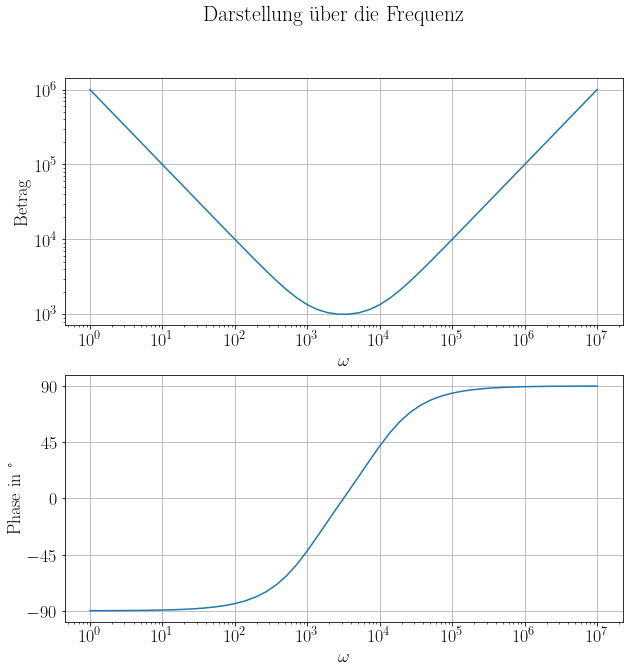

In [15]:
ZbN=Zb.subs({A:AN,R:RN,C:CN,L:LN})
phiZN=phiZ.subs({A:AN,R:RN,C:CN,L:LN})
#p1 = plot(180*phiZN/np.pi,(w, omega_start,omega_end),axis_center = [omega_start,0],xscale='log',xlabel = '$\omega$',ylim=[-90,90],ylabel='Phase in °',show=false)
#p2 = plot(ZbN,(w, omega_start,omega_end),xscale='log',yscale='log',ylabel='Betrag',xlabel = '$\omega$',show=false)
#p1.show()
#p2.show()

w_array = np.logspace(omega_start_exponent,omega_end_exponent,50) #generate omega array

fZbN=lambdify(w, ZbN,"numpy") #convert sympy to numpy

fphiZN=lambdify(w, 180*phiZN/np.pi,"numpy") #convert sympy to numpy

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(10, 10)
fig.suptitle('Darstellung über die Frequenz')

ax1.plot(w_array,fZbN(w_array))
ax1.set_ylabel('Betrag')
ax1.set(xlabel='$\omega$',xscale='log',yscale='log')
ax1.grid()

ax2.plot(w_array,fphiZN(w_array))
ax2.set(xlabel='$\omega$',xscale='log',ylabel = 'Phase in °',yticks=[-90,-45,0,45,90])
ax2.grid()



## Nyquist Plot

Ist eine Darstellung des Realteiles und des Imaginärteiles auf der komplexen Zahlenebene in Abhängigkeit der Frequenz.

In [21]:
ReZ = re(Z) # Realteil von Z
eq1 = Eq(S('Re(Z)'),ReZ)
display(eq1)
ImZ = im(Z) # Imaginärteil von Z
eq1 = Eq(S('Im(Z)'),ImZ)
display(eq1)

Re(Z) = R

                      1    
Im(Z) = L⋅\omega - ────────
                   C⋅\omega

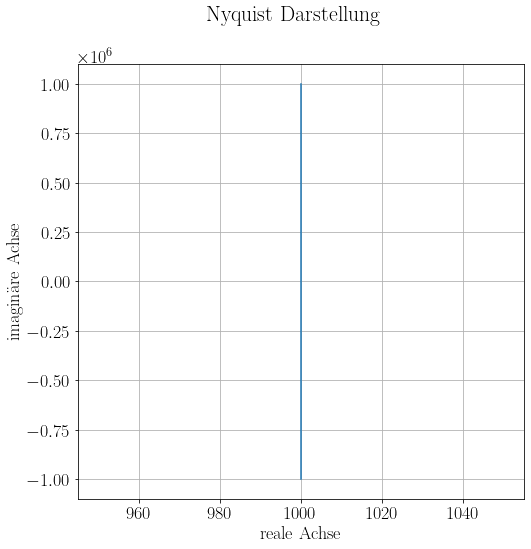

In [18]:


ReZ_N=ReZ.subs({A:AN,R:RN,C:CN,L:LN}) #Einsetzen der Zahlenwerte
ImZ_N=ImZ.subs({A:AN,R:RN,C:CN,L:LN}) #Einsetzen der Zahlenwerte

f_ReZ_N=lambdify(w, ReZ_N,"numpy") #Zahlenreihe aus Gleichung erstellen sympy to numpy

f_ImZ_N=lambdify(w, ImZ_N,"numpy") #Zahlenreihe aus Gleichung erstellen sympy to numpy

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
fig.suptitle('Nyquist Darstellung')
ax.plot(np.ones(len(w_array))*f_ReZ_N(w_array),f_ImZ_N(w_array))
ax.set_xlabel('reale Achse')
ax.set_ylabel('imaginäre Achse')
ax.grid()


